In [1]:
# Andmete sisselugemine
import pandas as pd
import numpy as np
pd.options.display.max_rows = 6

happy_2015_df = pd.read_csv("2015.csv")
happy_2016_df = pd.read_csv("2016.csv")
happy_2017_df = pd.read_csv("2017.csv")
happy_2018_df = pd.read_csv("2018.csv")
happy_2019_df = pd.read_csv("2019.csv")

# Lisame tunnuse "year"
happy_2015_df["year"] = 2015
happy_2016_df["year"] = 2016
happy_2017_df["year"] = 2017
happy_2018_df["year"] = 2018
happy_2019_df["year"] = 2019

# Valime need veerud, mis kõigil olemas on ja paneme need samasse järjekorda.
happy_2015 = happy_2015_df.iloc[:, [0, 2, 3, 5, 7, 8, 9, 10, 12]]
happy_2015.columns = ["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]
happy_2016 = happy_2016_df.iloc[:, [0, 2, 3, 6, 8, 9, 10, 11, 13]]
happy_2016.columns = ["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]
happy_2017 = happy_2017_df.iloc[:, [0, 1, 2, 5, 7, 8, 9, 10, 12]]
happy_2017.columns = ["country", "rank", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2017 = happy_2017[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]
happy_2018 = happy_2018_df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]]
happy_2018.columns = ["rank", "country", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2018 = happy_2018[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]
happy_2019 = happy_2019_df.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]]
happy_2019.columns = ["rank", "country", "score", "economy", "health", "freedom", "generosity", "trust", "year"]
happy_2019 = happy_2019[["country", "rank", "score", "economy", "health", "freedom", "trust", "generosity", "year"]]

# Ühendame andmestikud
happy = pd.concat([happy_2015, happy_2016, happy_2017, happy_2018, happy_2019], axis=0)
happy = happy.reset_index(drop=True) # Ajame indeksid paika

# Teeme sama nimega need, mis tegelikult on kõigis olemas
happy["country"] = happy["country"].replace("Hong Kong S.A.R., China", "Hong Kong")
happy["country"] = happy["country"].replace("Northern Cyprus", "North Cyprus")
happy["country"] = happy["country"].replace("Taiwan Province of China", "Taiwan")
happy["country"] = happy["country"].replace("Trinidad and Tobago", "Trinidad & Tobago")
# Muudame ka kongosid, et teiste andmestikega klapiks
happy["country"] = happy["country"].replace("Congo (Kinshasa)", "Democratic Republic of the Congo")
happy["country"] = happy["country"].replace("Congo (Brazzaville)", "Republic of the Congo")

# Vaatame uuesti, mis on puudulikud ja eemaldame need andmestikust (Somalia???)
loendus = happy.groupby('country').count()
loendus = loendus["rank"]
loendus = loendus[loendus < 5]
puudulikud = loendus.index.tolist()
happy = happy[~happy['country'].isin(puudulikud)]

# teeme AÜE korda
happy[happy['trust'].isnull()] # 2018 AÜE trust puudu, asendame 2017 ja 2019 keskmisega
kesk = (float(happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2017),"trust"]) + float(happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2019),"trust"]))/2
happy.loc[(happy["country"] == "United Arab Emirates") & (happy["year"] == 2018),"trust"] = kesk

happy

,country,rank,score,economy,health,freedom,trust,generosity,year
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019


In [2]:
GDP_df = pd.read_excel("ProjectedRealPerCapitaGDPValues.xls" , sheet_name='Projected Real GDP Per Capita')

riigid = happy["country"].unique().tolist()
GDP = GDP_df[GDP_df['Country'].isin(riigid)] # Valime välja vaid happiness reportis esinevad riigid
GDP = GDP.iloc[:,[0, 5,6,7,8,9]]

# Uurime mis välja jäid
riigid2 = GDP["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# Vaatame käsitsi need riigid GDP excelist üle ja vajadusel muudame nimesid

GDP_df["Country"] = GDP_df["Country"].replace("Côte d'Ivoire", "Ivory Coast")
GDP_df["Country"] = GDP_df["Country"].replace("Korea", "South Korea")
GDP_df["Country"] = GDP_df["Country"].replace("Trinidad and Tobago", "Trinidad & Tobago")

# Kaasame väljajäänud riigid
GDP = GDP_df[GDP_df['Country'].isin(riigid)] 
GDP = GDP.iloc[:,[0, 5,6,7,8,9]]

GDP

,Country,2015,2016,2017,2018,2019
3,Canada,51354.109375,51692.875000,52878.199219,53484.242188,53825.738281
4,United States,52005.167969,52525.148438,53296.578125,54421.187500,55380.246094
7,Mexico,10047.209961,10218.336914,10309.086914,10399.106445,10343.576172
...,...,...,...,...,...,...
215,Tanzania,853.806335,887.457886,921.888000,943.584595,974.751526
216,Uganda,659.463257,669.037720,672.916260,691.467224,709.582275
217,Zambia,1729.422852,1742.983521,1750.247803,1764.407471,1758.144165


In [3]:
# Ühendame GDP ja happy andmestikud
happy2 = happy[happy['country'].isin(GDP["Country"].tolist())] 
happy2["GDP"] = 0
for i in range(0, happy2.shape[0]):
    aasta = happy2.iloc[i, 8]
    riik = happy2.iloc[i, 0]
    aasta_andmed = GDP[["Country", aasta]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy2.iloc[i, 9] = float(rida[aasta])
happy2

C:\Users\Airiin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Airiin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,country,rank,score,economy,health,freedom,trust,generosity,year,GDP
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,78065.890625
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,47247.511719
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,61505.738281
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019,871.358826
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019,974.751526
779,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019,594.889954


In [4]:
HDI_df = pd.read_csv("HDI.csv", delimiter=";")

riigid = happy2["country"].unique().tolist()
HDI = HDI_df[HDI_df['Country'].isin(riigid)]
HDI

# Uurime mis välja jäid
riigid2 = HDI["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

HDI

,Country,2015,2016,2017,2018,2019
0,Afghanistan,0.490,0.491,0.493,0.496,0.496
1,Albania,0.788,0.788,0.789,0.791,0.791
2,Algeria,0.751,0.755,0.758,0.759,0.759
...,...,...,...,...,...,...
185,Vietnam,0.680,0.685,0.690,0.693,0.693
186,Yemen,0.493,0.477,0.463,0.463,0.463
187,Zambia,0.570,0.580,0.589,0.591,0.591


In [5]:
# Ühendame HDI ja happy andmestikud
happy3 = happy2[happy2['country'].isin(HDI["Country"].tolist())] 
happy3["HDI"] = 0
for i in range(0, happy3.shape[0]):
    aasta = happy3.iloc[i, 8]
    riik = happy3.iloc[i, 0]
    aasta_andmed = HDI[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy3.iloc[i, 10] = float(rida[str(aasta)])
happy3

C:\Users\Airiin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,rank,score,economy,health,freedom,trust,generosity,year,GDP,HDI
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,78065.890625,0.943
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,47247.511719,0.927
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,61505.738281,0.926
...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019,871.358826,0.536
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019,974.751526,0.528
779,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019,594.889954,0.496


In [6]:
inequality_df = pd.read_csv("inequality.csv", delimiter=";")

riigid = happy3["country"].unique().tolist()
inequality = inequality_df[inequality_df['Country'].isin(riigid)]
inequality

# Uurime mis välja jäid
riigid2 = inequality["Country"].tolist()
valja = set(riigid).difference(set(riigid2))
valja

# let's use 2018 data for 2019, as 2019 is missing
inequality["2019"] = inequality["2018"]
inequality

C:\Users\Airiin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Country,2015,2016,2017,2018,2019
0,Afghanistan,30.4,28.2,28.2,NaN,NaN
1,Albania,13.4,12.2,10.0,10.9,10.9
2,Algeria,NaN,NaN,20.1,19.7,19.7
...,...,...,...,...,...,...
201,Venezuela,19.1,17.8,16.2,17.0,17.0
203,Vietnam,17.7,17.2,17.2,16.2,16.2
205,Yemen,32.7,30.5,30.9,30.9,30.9


In [7]:
# Ühendame inequality ja happy andmestikud
happy4 = happy3[happy3['country'].isin(inequality["Country"].tolist())] 
happy4["inequality"] = 0
for i in range(0, happy4.shape[0]):
    aasta = happy4.iloc[i, 8]
    riik = happy4.iloc[i, 0]
    aasta_andmed = inequality[["Country", str(aasta)]]
    rida = aasta_andmed[aasta_andmed["Country"] == riik]
    happy4.iloc[i, 11] = float(rida[str(aasta)])
happy4

,country,rank,score,economy,health,freedom,trust,generosity,year,GDP,HDI,inequality
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,78065.890625,0.943,8.4
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,47247.511719,0.927,5.7
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,61505.738281,0.926,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019,871.358826,0.536,28.4
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019,974.751526,0.528,24.9
779,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019,594.889954,0.496,NaN


In [8]:
import matplotlib.pyplot as plt

[Text(0.5, 0, 'Inequality index')]

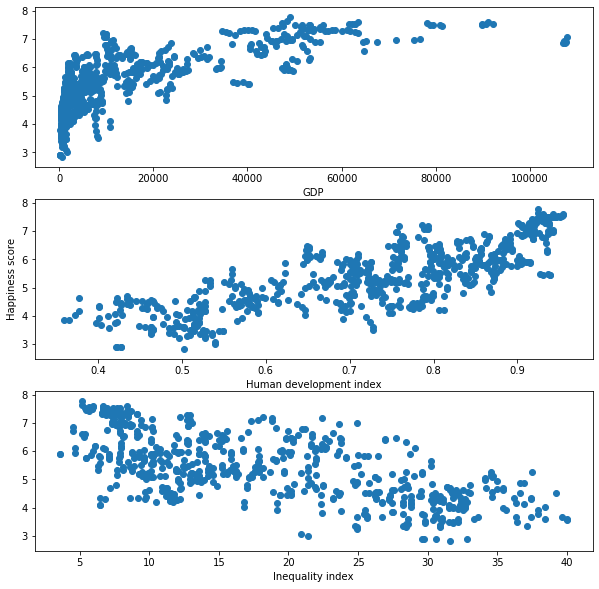

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey= True, figsize = (10,10))
ax1.scatter(happy4.GDP, happy4.score)
ax1.set(xlabel = "GDP")
ax2.scatter(happy4.HDI, happy4.score)
ax2.set(xlabel = "Human development index", ylabel = "Happiness score")
ax3.scatter(happy4.inequality, happy4.score)
ax3.set(xlabel = "Inequality index")

In [10]:
happy_X = happy4.iloc[:, [9,10,11]]
happy_y = happy4.iloc[:, 2]

import statsmodels.api as sm

happy_X = sm.add_constant(happy_X)
model = sm.OLS(happy_y, happy_X).fit()
print(model.summary())

C:\Users\Airiin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


MissingDataError: exog contains inf or nans